In [2]:
import pandas as pd
import os

In [3]:
# Load dataset

dir_path = '/Users/tinmanee/Downloads/SquatCounter_csv_files/'
table = [os.path.join(dir_path, filename) for filename in os.listdir(dir_path) if filename.endswith('csv')]
dfs = []
for f in table:
    dff = pd.read_csv(f)
    my_column_changes = dff["Position"].shift() != dff["Position"]
    my_column_changes = dff[my_column_changes == True]
    my_column_changes_0 = my_column_changes[my_column_changes["Position"] == 0]["Unnamed: 0.1"].to_numpy()
    for i in my_column_changes_0[::-1]:
        if i+20 >= len(dff.index):
            dff = dff.drop(range(i,dff.index))
        else:
            dff = dff.drop(range(i,i+20))
    my_column_changes = dff["Position"].shift() != dff["Position"]
    my_column_changes = dff[my_column_changes == True]
    my_column_changes_1 = my_column_changes.loc[my_column_changes["Position"] == 1].index.to_numpy()
    for i in my_column_changes_1[::-1]:
        if i-20 <= 0:
            dff = dff.drop(range(0,i))
        else:
            dff = dff.drop(range(i-20,i))
    dfs.append(dff)
df = pd.concat(dfs, ignore_index=True)

In [4]:
df.head()

,Unnamed: 0.1,Unnamed: 0,x0,y0,c0,x1,y1,c1,x2,y2,...,x15,y15,c15,x16,y16,c16,Type,Position,File,score
0,20,20,0.341192,0.755538,0.057322,0.222037,0.754895,0.044225,0.172058,0.792658,...,0.969364,0.757560,0.469028,0.947179,0.717477,0.148353,1,0,237,4
1,21,21,0.180668,0.783953,0.100990,0.187292,0.771089,0.101300,0.179004,0.794862,...,0.969657,0.758984,0.473707,0.952080,0.675185,0.180375,1,0,237,4
2,22,22,0.196374,0.787301,0.070079,0.177595,0.785565,0.104900,0.175540,0.782342,...,0.874653,0.725278,0.122986,0.874102,0.688651,0.110302,1,0,237,4
3,23,23,0.206431,0.799383,0.023790,0.205240,0.801012,0.043102,0.207481,0.808810,...,0.821249,0.725969,0.097312,0.735159,0.670391,0.156690,1,0,237,4
4,24,24,0.222971,0.791090,0.131779,0.188094,0.789129,0.175820,0.212369,0.793594,...,0.913653,0.718815,0.173442,0.912671,0.696039,0.246257,1,0,237,4


In [5]:
df.shape

(73248, 57)

In [6]:
df2 = df.copy()
df2['y0'] = 1-df2['y0']
df2['y1'] = 1-df2['y1']
df2['y2'] = 1-df2['y2']
df2['y3'] = 1-df2['y3']
df2['y4'] = 1-df2['y4']
df2['y5'] = 1-df2['y5']
df2['y6'] = 1-df2['y6']
df2['y7'] = 1-df2['y7']
df2['y8'] = 1-df2['y8']
df2['y9'] = 1-df2['y9']
df2['y10'] = 1-df2['y10']
df2['y11'] = 1-df2['y11']
df2['y12'] = 1-df2['y12']
df2['y13'] = 1-df2['y13']
df2['y14'] = 1-df2['y14']
df2['y15'] = 1-df2['y15']
df2['y16'] = 1-df2['y16']
df2.head()

,Unnamed: 0.1,Unnamed: 0,x0,y0,c0,x1,y1,c1,x2,y2,...,x15,y15,c15,x16,y16,c16,Type,Position,File,score
0,20,20,0.341192,0.244462,0.057322,0.222037,0.245105,0.044225,0.172058,0.207342,...,0.969364,0.242440,0.469028,0.947179,0.282523,0.148353,1,0,237,4
1,21,21,0.180668,0.216047,0.100990,0.187292,0.228911,0.101300,0.179004,0.205138,...,0.969657,0.241016,0.473707,0.952080,0.324815,0.180375,1,0,237,4
2,22,22,0.196374,0.212699,0.070079,0.177595,0.214435,0.104900,0.175540,0.217658,...,0.874653,0.274722,0.122986,0.874102,0.311349,0.110302,1,0,237,4
3,23,23,0.206431,0.200617,0.023790,0.205240,0.198988,0.043102,0.207481,0.191190,...,0.821249,0.274031,0.097312,0.735159,0.329609,0.156690,1,0,237,4
4,24,24,0.222971,0.208910,0.131779,0.188094,0.210871,0.175820,0.212369,0.206406,...,0.913653,0.281185,0.173442,0.912671,0.303961,0.246257,1,0,237,4


In [7]:
df = pd.concat([df,df2])

In [8]:
df.shape

(146496, 57)

In [9]:
df = df.loc[(df['c5'] >= 0.15) & (df['c6'] >= 0.15) & (df['c11'] >= 0.15) & (df['c12'] >= 0.15) &
            (df['c13'] >= 0.15) & (df['c14'] >= 0.15) & (df['c15'] >= 0.15) & (df['c16'] >= 0.15)]

In [10]:
df.shape

(117794, 57)

In [11]:
X = df.drop(['Unnamed: 0.1', 'Unnamed: 0','Type','Position','File','score'], axis=1)
y = df['Position'].to_numpy()

In [12]:
# Dictionary that maps from joint names to keypoint indices.
KEYPOINT_DICT = {
    'nose': 0,
    'left_eye': 1,
    'right_eye': 2,
    'left_ear': 3,
    'right_ear': 4,
    'left_shoulder': 5,
    'right_shoulder': 6,
    'left_elbow': 7,
    'right_elbow': 8,
    'left_wrist': 9,
    'right_wrist': 10,
    'left_hip': 11,
    'right_hip': 12,
    'left_knee': 13,
    'right_knee': 14,
    'left_ankle': 15,
    'right_ankle': 16
}

In [13]:
# feature extraction
extracted = pd.DataFrame()

# shoulder - hip
extracted['x_ls-lh_l'] = X['x5']-X['x11']
extracted['y_ls-lh_l'] = X['y5']-X['y11']
extracted['x_ls-lh_r'] = X['x6']-X['x12']
extracted['y_ls-lh_r'] = X['y6']-X['y12']

# hip - knee
extracted['x_lh-lk_l'] = X['x11']-X['x13']
extracted['y_lh-lk_l'] = X['y11']-X['y13']
extracted['x_lh-lk_r'] = X['x12']-X['x14']
extracted['y_lh-lk_r'] = X['y12']-X['y14']

#knee - ankle
extracted['x_lk-la_l'] = X['x13']-X['x15']
extracted['y_lk-la_l'] = X['y13']-X['y15']
extracted['x_lk-la_r'] = X['x14']-X['x16']
extracted['y_lk-la_r'] = X['y14']-X['y16']

In [14]:
import numpy as np
extracted['length'] = extracted['x_ls-lh_l']**2+extracted['y_ls-lh_l']**2
extracted['length'] = np.sqrt(extracted['length'])

# shoulder - hip
extracted['x_ls-lh_l'] = extracted['x_ls-lh_l']/extracted['length']
extracted['y_ls-lh_l'] = extracted['y_ls-lh_l']/extracted['length']
extracted['x_ls-lh_r'] = extracted['x_ls-lh_r']/extracted['length']
extracted['y_ls-lh_r'] = extracted['y_ls-lh_r']/extracted['length']

# hip - knee
extracted['x_lh-lk_l'] = extracted['x_lh-lk_l']/extracted['length']
extracted['y_lh-lk_l'] = extracted['y_lh-lk_l']/extracted['length']
extracted['x_lh-lk_r'] = extracted['x_lh-lk_r']/extracted['length']
extracted['y_lh-lk_r'] = extracted['y_lh-lk_r']/extracted['length']

#knee - ankle
extracted['x_lk-la_l'] = extracted['x_lk-la_l']/extracted['length']
extracted['y_lk-la_l'] = extracted['y_lk-la_l']/extracted['length']
extracted['x_lk-la_r'] = extracted['x_lk-la_r']/extracted['length']
extracted['y_lk-la_r'] = extracted['y_lk-la_r']/extracted['length']

# Angle
extracted['a1'] = extracted['x_ls-lh_l']/extracted['y_ls-lh_l']
extracted['a2'] = extracted['x_ls-lh_r']/extracted['y_ls-lh_r']
extracted['a3'] = extracted['x_lh-lk_l']/extracted['y_lh-lk_l']
extracted['a4'] = extracted['x_lh-lk_r']/extracted['y_lh-lk_r']
extracted['a5'] = extracted['x_lk-la_l']/extracted['y_lk-la_l']
extracted['a6'] = extracted['x_lk-la_r']/extracted['y_lk-la_r']

# confidence
extracted['c5'] = X['c5']
extracted['c6'] = X['c6']
extracted['c11'] = X['c11']
extracted['c12'] = X['c12']
extracted['c13'] = X['c13']
extracted['c14'] = X['c14']
extracted['c15'] = X['c15']
extracted['c16'] = X['c16']

In [15]:
X = extracted[['a1','a2','a3','a4','a5','a6']]

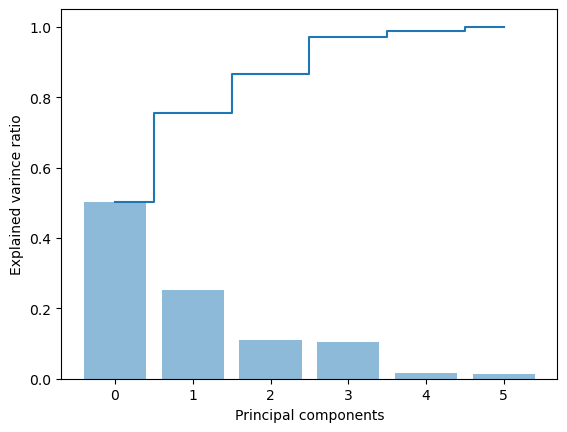

6


In [16]:
# Dimensionality reduction
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np
pca = PCA()
pca.fit(X)
plt.bar(range(len(X.columns)), pca.explained_variance_ratio_, alpha=0.5, align='center')
plt.step(range(len(X.columns)), np.cumsum(pca.explained_variance_ratio_), where='mid')
plt.ylabel('Explained varince ratio')
plt.xlabel('Principal components')
plt.show()
cumsum = np.cumsum(pca.explained_variance_ratio_)
k = np.argmax(cumsum >= 0.99) + 1
print(k)

# Feature Importance

In [136]:
# Check feature importance
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)
from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier(random_state=0)
forest.fit(X_train, y_train)

RandomForestClassifier(random_state=0)

In [137]:
from sklearn.inspection import permutation_importance
import time

start_time = time.time()
result = permutation_importance(
    forest, X_test, y_test, n_repeats=10, random_state=42, n_jobs=2
)
elapsed_time = time.time() - start_time
print(f"Elapsed time to compute the importances: {elapsed_time:.3f} seconds")

forest_importances = pd.Series(result.importances_mean)

Elapsed time to compute the importances: 8.361 seconds


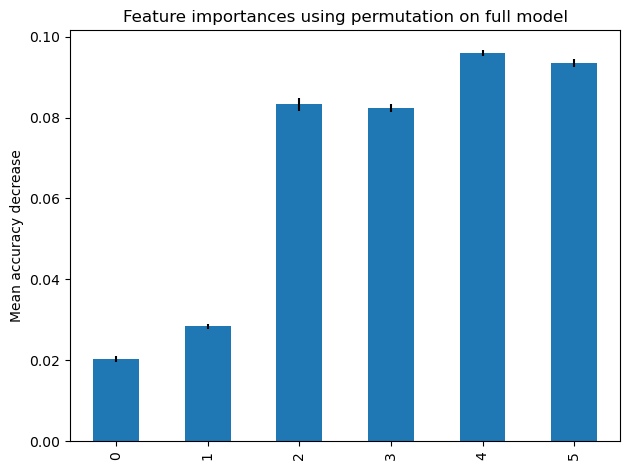

In [138]:
import matplotlib.pyplot as plt 
fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=result.importances_std, ax=ax)
ax.set_title("Feature importances using permutation on full model")
ax.set_ylabel("Mean accuracy decrease")
fig.tight_layout()
plt.show()

# ML

In [17]:
X['File'] = df['File']
X['y'] = y
uniqueFile = X.File.unique()
g1 = X.loc[X['File'].isin(uniqueFile[0:5])]
g2 = X.loc[X['File'].isin(uniqueFile[5:10])]
g3 = X.loc[X['File'].isin(uniqueFile[10:15])]
g4 = X.loc[X['File'].isin(uniqueFile[15:20])]
g5 = X.loc[X['File'].isin(uniqueFile[20:25])]
X = X.drop(columns='File')
g1 = g1.drop(columns='File')
g2 = g2.drop(columns='File')
g3 = g3.drop(columns='File')
g4 = g4.drop(columns='File')
g5 = g5.drop(columns='File')
t1 = g1['y'].to_numpy()
t2 = g2['y'].to_numpy()
t3 = g3['y'].to_numpy()
t4 = g4['y'].to_numpy()
t5 = g5['y'].to_numpy()
X = X.drop(columns='y')
g1 = g1.drop(columns='y')
g2 = g2.drop(columns='y')
g3 = g3.drop(columns='y')
g4 = g4.drop(columns='y')
g5 = g5.drop(columns='y')
print(y.shape,t1.shape,t2.shape,t3.shape,t4.shape,t5.shape)
print(X.shape,g1.shape,g2.shape,g3.shape,g4.shape,g5.shape)
g = [g1,g2,g3,g4,g5]
t = [t1,t2,t3,t4,t5]

(117794,) (23546,) (24350,) (21912,) (24712,) (23274,)
(117794, 6) (23546, 6) (24350, 6) (21912, 6) (24712, 6) (23274, 6)


/var/folders/qk/285_k6997n3dm5s2dv0z7hm40000gn/T/ipykernel_3518/1147909656.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['File'] = df['File']
/var/folders/qk/285_k6997n3dm5s2dv0z7hm40000gn/T/ipykernel_3518/1147909656.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['y'] = y


In [18]:
g1.dtypes

a1    float64
a2    float64
a3    float64
a4    float64
a5    float64
a6    float64
dtype: object

In [18]:
# Logistic Regression
import warnings
warnings.filterwarnings('ignore')
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from imblearn.under_sampling import OneSidedSelection

param_range = [0.001, 0.01, 0.1, 1.0, 10.0, 100.0]
test_mean = []
test_std = []
recall_mean = []
recall_std = []

for i in param_range:
    test_scores = []
    recall_scores = []
    for j in range(5):
        pipe_lr = make_pipeline(StandardScaler(), LogisticRegression(random_state=1, solver='liblinear', C=i))
        oss = OneSidedSelection(random_state=42)
        X_n, y_n = oss.fit_resample(pd.concat(g[:j] + g[j+1:]), np.concatenate(t[:j] + t[j+1:]))
        pipe_lr.fit(X_n,y_n)
        test_scores.append(accuracy_score(pipe_lr.predict(g[j]),t[j]))
        recall_scores.append(recall_score(pipe_lr.predict(g[j]),t[j]))
    print(i, test_scores)
    print(recall_scores)
    test_scores = np.array(test_scores)
    test_mean.append(np.mean(test_scores))
    test_std.append(np.std(test_scores))
    recall_scores = np.array(recall_scores)
    recall_mean.append(np.mean(recall_scores))
    recall_std.append(np.std(recall_scores))
    
np.set_printoptions(suppress=True)
print(np.array([param_range,test_mean,test_std,recall_mean,recall_std]))

0.001 [0.8677482374925677, 0.8649691991786448, 0.8849945235487404, 0.8456620265458077, 0.8625934519205981]
[0.0, 0.0, 0.0, 0.0, 0.0]
0.01 [0.8677482374925677, 0.8649691991786448, 0.8849945235487404, 0.8456620265458077, 0.8625934519205981]
[0.0, 0.0, 0.0, 0.0, 0.0]
0.1 [0.8677482374925677, 0.8649691991786448, 0.8849945235487404, 0.8456620265458077, 0.8625934519205981]
[0.0, 0.0, 0.0, 0.0, 0.0]
1.0 [0.8677482374925677, 0.8649691991786448, 0.8849945235487404, 0.8456620265458077, 0.8625934519205981]
[0.0, 0.0, 0.0, 0.0, 0.0]
10.0 [0.8677482374925677, 0.8649691991786448, 0.8849945235487404, 0.8456620265458077, 0.8625934519205981]
[0.0, 0.0, 0.0, 0.0, 0.0]
100.0 [0.8677482374925677, 0.8649691991786448, 0.8849945235487404, 0.8456620265458077, 0.8625934519205981]
[0.0, 0.0, 0.0, 0.0, 0.0]
[[  0.001        0.01         0.1          1.          10.
  100.        ]
 [  0.86519349   0.86519349   0.86519349   0.86519349   0.86519349
    0.86519349]
 [  0.01254509   0.01254509   0.01254509   0.01254

In [ ]:
# Logistic Regression Balanced
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score

param_range = [0.001, 0.01, 0.1, 1.0, 10.0, 100.0]
test_mean = []
test_std = []
recall_mean = []
recall_std = []

for i in param_range:
    test_scores = []
    recall_scores = []
    for j in range(5):
        pipe_lr = make_pipeline(StandardScaler(), LogisticRegression(random_state=1, solver='liblinear', C=i, class_weight='balanced'))
        oss = OneSidedSelection(random_state=42)
        X_n, y_n = oss.fit_resample(pd.concat(g[:j] + g[j+1:]), np.concatenate(t[:j] + t[j+1:]))
        pipe_lr.fit(X_n,y_n)
        test_scores.append(accuracy_score(pipe_lr.predict(g[j]),t[j]))
        recall_scores.append(recall_score(pipe_lr.predict(g[j]),t[j]))
    print(i, test_scores)
    print(recall_scores)
    test_scores = np.array(test_scores)
    test_mean.append(np.mean(test_scores))
    test_std.append(np.std(test_scores))
    recall_scores = np.array(recall_scores)
    recall_mean.append(np.mean(recall_scores))
    recall_std.append(np.std(recall_scores))
    
np.set_printoptions(suppress=True)
print(np.array([param_range,test_mean,test_std,recall_mean,recall_std]))

In [ ]:
# Logistic Regression not scale
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score

param_range = [0.001, 0.01, 0.1, 1.0, 10.0, 100.0]
test_mean = []
test_std = []
recall_mean = []
recall_std = []

for i in param_range:
    test_scores = []
    recall_scores = []
    for j in range(5):
        pipe_lr = LogisticRegression(random_state=1, solver='liblinear', C=i, class_weight='balanced')
        oss = OneSidedSelection(random_state=42)
        X_n, y_n = oss.fit_resample(pd.concat(g[:j] + g[j+1:]), np.concatenate(t[:j] + t[j+1:]))
        pipe_lr.fit(X_n,y_n)
        test_scores.append(accuracy_score(pipe_lr.predict(g[j]),t[j]))
        recall_scores.append(recall_score(pipe_lr.predict(g[j]),t[j]))
    print(i, test_scores)
    print(recall_scores)
    test_scores = np.array(test_scores)
    test_mean.append(np.mean(test_scores))
    test_std.append(np.std(test_scores))
    recall_scores = np.array(recall_scores)
    recall_mean.append(np.mean(recall_scores))
    recall_std.append(np.std(recall_scores))
    
np.set_printoptions(suppress=True)
print(np.array([param_range,test_mean,test_std,recall_mean,recall_std]))

In [ ]:
# SVM
import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import accuracy_score
from sklearn.linear_model import SGDClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.metrics import recall_score

param_range = [0.0001, 0.001, 0.01, 0.1, 1, 10]
test_mean = []
test_std = []
recall_mean = []
recall_std = []

for i in param_range:
    test_scores = []
    recall_scores = []
    for j in range(5):
        pipe_lr = make_pipeline(StandardScaler(), SGDClassifier(alpha=i))
        oss = OneSidedSelection(random_state=42)
        X_n, y_n = oss.fit_resample(pd.concat(g[:j] + g[j+1:]), np.concatenate(t[:j] + t[j+1:]))
        pipe_lr.fit(X_n,y_n)
        test_scores.append(accuracy_score(pipe_lr.predict(g[j]),t[j]))
        recall_scores.append(recall_score(pipe_lr.predict(g[j]),t[j]))
    print(i, test_scores)
    print(recall_scores)
    test_scores = np.array(test_scores)
    test_mean.append(np.mean(test_scores))
    test_std.append(np.std(test_scores))
    recall_scores = np.array(recall_scores)
    recall_mean.append(np.mean(recall_scores))
    recall_std.append(np.std(recall_scores))
    
np.set_printoptions(suppress=True)
print(np.array([param_range,test_mean,test_std,recall_mean,recall_std]))

In [145]:
# SVM Balanced
import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import accuracy_score
from sklearn.linear_model import SGDClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.metrics import recall_score

param_range = [0.0001, 0.001, 0.01, 0.1, 1, 10]
test_mean = []
test_std = []
recall_mean = []
recall_std = []

for i in param_range:
    test_scores = []
    recall_scores = []
    for j in range(5):
        pipe_lr = make_pipeline(StandardScaler(), SGDClassifier(alpha=i,class_weight='balanced'))
        pipe_lr.fit(pd.concat(g[:j] + g[j+1:]),np.concatenate(t[:j] + t[j+1:]))
        test_scores.append(accuracy_score(pipe_lr.predict(g[j]),t[j]))
        recall_scores.append(recall_score(pipe_lr.predict(g[j]),t[j]))
    print(i, test_scores)
    print(recall_scores)
    test_scores = np.array(test_scores)
    test_mean.append(np.mean(test_scores))
    test_std.append(np.std(test_scores))
    recall_scores = np.array(recall_scores)
    recall_mean.append(np.mean(recall_scores))
    recall_std.append(np.std(recall_scores))
    
np.set_printoptions(suppress=True)
print(np.array([param_range,test_mean,test_std,recall_mean,recall_std]))

0.0001 [0.19442792831054106, 0.13691991786447638, 0.12198795180722892, 0.160974425380382, 0.21289851336255047]
[0.1408897345293105, 0.13522633744855966, 0.11574350723971501, 0.1553409924223906, 0.1463916561433048]
0.001 [0.13356833432430137, 0.8603696098562629, 0.11632895217232567, 0.15882971835545484, 0.14007046489645097]
[0.1324261109929832, 0.025423728813559324, 0.11515788511630032, 0.15497824938000568, 0.13774235243429556]
0.01 [0.8676208273167417, 0.8648049281314169, 0.1153705732018985, 0.8443266429265134, 0.13757841368050186]
[0.0, 0.0, 0.11504747991234478, 0.02857142857142857, 0.13743016759776536]
0.1 [0.13225176250743226, 0.8649281314168378, 0.11500547645125958, 0.15433797345419228, 0.8625934519205981]
[0.13225176250743226, 0.0, 0.11500547645125958, 0.15433797345419228, 0.0]
1 [0.8677482374925677, 0.13503080082135524, 0.11500547645125958, 0.15433797345419228, 0.8625934519205981]
[0.0, 0.13503080082135524, 0.11500547645125958, 0.15433797345419228, 0.0]
10 [0.13225176250743226, 0

In [19]:
# DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score

param_range = [12, 25, 50, 100, 200]
test_mean = []
test_std = []
recall_mean = []
recall_std = []

for i in param_range:
    test_scores = []
    recall_scores = []
    for j in range(5):
        pipe_lr = make_pipeline(StandardScaler(), DecisionTreeClassifier(criterion='gini', random_state=1, max_depth=i))
        oss = OneSidedSelection(random_state=42)
        X_n, y_n = oss.fit_resample(pd.concat(g[:j] + g[j+1:]), np.concatenate(t[:j] + t[j+1:]))
        pipe_lr.fit(X_n,y_n)
        test_scores.append(accuracy_score(pipe_lr.predict(g[j]),t[j]))
        recall_scores.append(recall_score(pipe_lr.predict(g[j]),t[j]))
    print(i, test_scores)
    print(recall_scores)
    test_scores = np.array(test_scores)
    test_mean.append(np.mean(test_scores))
    test_std.append(np.std(test_scores))
    recall_scores = np.array(recall_scores)
    recall_mean.append(np.mean(recall_scores))
    recall_std.append(np.std(recall_scores))
    
np.set_printoptions(suppress=True)
print(np.array([param_range,test_mean,test_std,recall_mean,recall_std]))

12 [0.9275036099549817, 0.9312114989733059, 0.9068546914932457, 0.9554467465199094, 0.923090143507777]
[0.7104397247980856, 0.7891717461455718, 0.6034557235421166, 0.8796529527008117, 0.7306684141546527]
25 [0.9265267986069821, 0.9282135523613964, 0.9093647316538883, 0.9442376173518938, 0.9140242330497551]
[0.6974885844748858, 0.7651515151515151, 0.6097861842105263, 0.8318801089918256, 0.7093389296956978]
50 [0.9263144483139387, 0.9275564681724846, 0.9089539978094195, 0.943306895435416, 0.914196098650855]
[0.6963827969239533, 0.7636678200692042, 0.6086956521739131, 0.8290155440414507, 0.7088695652173913]
100 [0.9263144483139387, 0.9275564681724846, 0.9089539978094195, 0.943306895435416, 0.914196098650855]
[0.6963827969239533, 0.7636678200692042, 0.6086956521739131, 0.8290155440414507, 0.7088695652173913]
200 [0.9263144483139387, 0.9275564681724846, 0.9089539978094195, 0.943306895435416, 0.914196098650855]
[0.6963827969239533, 0.7636678200692042, 0.6086956521739131, 0.8290155440414507, 

In [20]:
# DecisionTreeClassifier Balanced
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score

param_range = [12, 25, 50, 100, 200]
test_mean = []
test_std = []
recall_mean = []
recall_std = []

for i in param_range:
    test_scores = []
    recall_scores = []
    for j in range(5):
        pipe_lr = make_pipeline(StandardScaler(), DecisionTreeClassifier(criterion='gini', random_state=1, max_depth=i,class_weight='balanced'))
        oss = OneSidedSelection(random_state=42)
        X_n, y_n = oss.fit_resample(pd.concat(g[:j] + g[j+1:]), np.concatenate(t[:j] + t[j+1:]))
        pipe_lr.fit(X_n,y_n)
        test_scores.append(accuracy_score(pipe_lr.predict(g[j]),t[j]))
        recall_scores.append(recall_score(pipe_lr.predict(g[j]),t[j]))
    print(i, test_scores)
    print(recall_scores)
    test_scores = np.array(test_scores)
    test_mean.append(np.mean(test_scores))
    test_std.append(np.std(test_scores))
    recall_scores = np.array(recall_scores)
    recall_mean.append(np.mean(recall_scores))
    recall_std.append(np.std(recall_scores))
    
np.set_printoptions(suppress=True)
print(np.array([param_range,test_mean,test_std,recall_mean,recall_std]))

12 [0.92015628981568, 0.9271457905544148, 0.9027473530485579, 0.9357397215927484, 0.9175904442725789]
[0.6377847253238053, 0.6967255717255717, 0.5553028148990617, 0.7155305964368707, 0.644927536231884]
25 [0.9279707805996772, 0.9315811088295688, 0.9068090543994158, 0.9468679184202007, 0.9162584858640543]
[0.6990454800673779, 0.7817929117442669, 0.6060337178349601, 0.8230431413071557, 0.7191997191997191]
50 [0.9299244032956765, 0.9294455852156057, 0.9071741511500547, 0.945694399482033, 0.9160006874624044]
[0.7115606936416184, 0.7842143374366402, 0.6107566089334548, 0.8275039745627981, 0.7206247781327654]
100 [0.9299244032956765, 0.9294455852156057, 0.9071741511500547, 0.945694399482033, 0.9160006874624044]
[0.7115606936416184, 0.7842143374366402, 0.6107566089334548, 0.8275039745627981, 0.7206247781327654]
200 [0.9299244032956765, 0.9294455852156057, 0.9071741511500547, 0.945694399482033, 0.9160006874624044]
[0.7115606936416184, 0.7842143374366402, 0.6107566089334548, 0.8275039745627981,

In [24]:
# RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score

param_range = [12, 25, 50, 100, 200]
test_mean = []
test_std = []
recall_mean = []
recall_std = []

for i in param_range:
    test_scores = []
    recall_scores = []
    for j in range(5):
        pipe_lr = make_pipeline(StandardScaler(), RandomForestClassifier(criterion='gini', random_state=1, n_estimators=i, max_depth = 12))
        oss = OneSidedSelection(random_state=42)
        X_n, y_n = oss.fit_resample(pd.concat(g[:j] + g[j+1:]), np.concatenate(t[:j] + t[j+1:]))
        pipe_lr.fit(X_n,y_n)
        test_scores.append(accuracy_score(pipe_lr.predict(g[j]),t[j]))
        recall_scores.append(recall_score(pipe_lr.predict(g[j]),t[j]))
    print(i, test_scores)
    print(recall_scores)
    test_scores = np.array(test_scores)
    test_mean.append(np.mean(test_scores))
    test_std.append(np.std(test_scores))
    recall_scores = np.array(recall_scores)
    recall_mean.append(np.mean(recall_scores))
    recall_std.append(np.std(recall_scores))
    
np.set_printoptions(suppress=True)
print(np.array([param_range,test_mean,test_std,recall_mean,recall_std]))

12 [0.9296695829440245, 0.9374537987679672, 0.9094103687477182, 0.9628925218517319, 0.9499011772793675]
[0.7099654377880185, 0.802329564919493, 0.6274416388756551, 0.9132667617689015, 0.8088145896656534]
25 [0.9282256009513293, 0.93782340862423, 0.910825118656444, 0.9624473939786339, 0.9533814557016413]
[0.7066163668020894, 0.8086290883785665, 0.6323666978484564, 0.9127574370709383, 0.8200545289306271]
50 [0.9292448823579377, 0.9370431211498973, 0.9107338444687842, 0.9624069278083522, 0.9548423133109908]
[0.7124413145539906, 0.8084358523725835, 0.6340304182509505, 0.9146306409887899, 0.8324558686899969]
100 [0.9303066338231547, 0.9363039014373716, 0.9116922234392114, 0.9632567173842668, 0.9577640285296898]
[0.7191312109491222, 0.8063492063492064, 0.6382978723404256, 0.9158557527189468, 0.8488188976377953]
200 [0.9310286248195022, 0.9373716632443532, 0.9111902154070829, 0.9634995144059566, 0.9566898685228151]
[0.7211995249406176, 0.8059701492537313, 0.6355051935788479, 0.918150488225158

In [25]:
# RandomForestClassifier Balanced
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score

param_range = [12, 25, 50, 100, 200]
test_mean = []
test_std = []
recall_mean = []
recall_std = []

for i in param_range:
    test_scores = []
    recall_scores = []
    for j in range(5):
        pipe_lr = make_pipeline(StandardScaler(), RandomForestClassifier(criterion='gini', random_state=1, n_estimators=i, max_depth = 25, class_weight='balanced'))
        oss = OneSidedSelection(random_state=42)
        X_n, y_n = oss.fit_resample(pd.concat(g[:j] + g[j+1:]), np.concatenate(t[:j] + t[j+1:]))
        pipe_lr.fit(X_n,y_n)
        test_scores.append(accuracy_score(pipe_lr.predict(g[j]),t[j]))
        recall_scores.append(recall_score(pipe_lr.predict(g[j]),t[j]))
    print(i, test_scores)
    print(recall_scores)
    test_scores = np.array(test_scores)
    test_mean.append(np.mean(test_scores))
    test_std.append(np.std(test_scores))
    recall_scores = np.array(recall_scores)
    recall_mean.append(np.mean(recall_scores))
    recall_std.append(np.std(recall_scores))
    
np.set_printoptions(suppress=True)
print(np.array([param_range,test_mean,test_std,recall_mean,recall_std]))

12 [0.9321753164019366, 0.9358521560574948, 0.9082694414019715, 0.9606668824862415, 0.931511557961674]
[0.7338883749614554, 0.8156547183613753, 0.6266137040714995, 0.9308671922377199, 0.8236481033091203]
25 [0.9344262295081968, 0.9387679671457906, 0.9097754654983571, 0.9651990935577857, 0.9368823579960471]
[0.7293980128579778, 0.820778293466619, 0.626691553896407, 0.9331378299120234, 0.8288322556104983]
50 [0.9338316486876752, 0.9385626283367556, 0.9090909090909091, 0.9652800258983489, 0.9362808283921973]
[0.7325164375373581, 0.8220704529115744, 0.6244109330819981, 0.93935790725327, 0.8291746641074856]
100 [0.935190690563153, 0.9388501026694045, 0.9105056589996349, 0.9661298154742635, 0.9379994844031967]
[0.7353289863663308, 0.8225170311939763, 0.6317774634606318, 0.9412985472872814, 0.8347958794353301]
200 [0.9357003312664571, 0.9388911704312115, 0.9099123767798467, 0.9655632890903205, 0.9379994844031967]
[0.7364066193853428, 0.8216583273766976, 0.6278089887640449, 0.9394838326905962,

In [26]:
# KNeighborsClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score

param_range = [2, 3, 5, 10, 20]
test_mean = []
test_std = []
recall_mean = []
recall_std = []

for i in param_range:
    test_scores = []
    recall_scores = []
    for j in range(5):
        pipe_lr = make_pipeline(StandardScaler(), KNeighborsClassifier(n_neighbors=i))
        oss = OneSidedSelection(random_state=42)
        X_n, y_n = oss.fit_resample(pd.concat(g[:j] + g[j+1:]), np.concatenate(t[:j] + t[j+1:]))
        pipe_lr.fit(X_n,y_n)
        test_scores.append(accuracy_score(pipe_lr.predict(g[j]),t[j]))
        recall_scores.append(recall_score(pipe_lr.predict(g[j]),t[j]))
    print(i, test_scores)
    print(recall_scores)
    test_scores = np.array(test_scores)
    test_mean.append(np.mean(test_scores))
    test_std.append(np.std(test_scores))
    recall_scores = np.array(recall_scores)
    recall_mean.append(np.mean(recall_scores))
    recall_std.append(np.std(recall_scores))
    
np.set_printoptions(suppress=True)
print(np.array([param_range,test_mean,test_std,recall_mean,recall_std]))

2 [0.9276734901894165, 0.9286242299794661, 0.8995983935742972, 0.9407575267076724, 0.9233479419094268]
[0.7392336385215327, 0.8292268479184367, 0.5763358778625954, 0.9021218343600274, 0.7948290241868223]
3 [0.9259746878450692, 0.9275564681724846, 0.8943044906900328, 0.9498219488507608, 0.9259259259259259]
[0.6927185830756255, 0.7683098591549296, 0.5362731152204836, 0.8645892351274788, 0.7333755541481951]
5 [0.9303066338231547, 0.9313347022587269, 0.8971339905074844, 0.9534639041761088, 0.9303944315545244]
[0.7064760302775441, 0.7923299565846599, 0.5465360391882436, 0.8784090909090909, 0.7476459510357816]
10 [0.9343412893909794, 0.9335523613963039, 0.9035231836436656, 0.9536257688572354, 0.9363237947924723]
[0.7308598351001178, 0.819433817903596, 0.5773038842345773, 0.8951421800947867, 0.7871485943775101]
20 [0.9330671876327189, 0.9351950718685832, 0.905713764147499, 0.9545969569439948, 0.9359800635902724]
[0.7200915855752719, 0.8197456993268512, 0.5854025583145221, 0.885894495412844, 0

In [19]:
# Majority Voting
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score
clf1 = KNeighborsClassifier(n_neighbors=20)
clf3 = RandomForestClassifier(criterion='gini', random_state=1, n_estimators= 200, max_depth = 12)
pipe1 = Pipeline([['sc', StandardScaler()], ['clf', clf1]])
pipe3 = Pipeline([['sc', StandardScaler()], ['clf', clf3]])
mv_clf_soft = VotingClassifier(estimators=[('kn', pipe1), ('rf',pipe3)], voting='soft')
clf_labels = ['KNN', 'RandomForest', 'Majority voting soft']
print('5-fold cross validation:\n')
test_scores = []
recall_scores = []
for j in range(5):
    pipe_lr = make_pipeline(StandardScaler(), KNeighborsClassifier(n_neighbors=i))
    oss = OneSidedSelection(random_state=42)
        X_n, y_n = oss.fit_resample(pd.concat(g[:j] + g[j+1:]), np.concatenate(t[:j] + t[j+1:]))
        pipe_lr.fit(X_n,y_n)
        test_scores.append(accuracy_score(pipe_lr.predict(g[j]),t[j]))
        recall_scores.append(recall_score(pipe_lr.predict(g[j]),t[j]))
    print(i, test_scores)
    print(recall_scores)
    test_scores = np.array(test_scores)
    test_mean.append(np.mean(test_scores))
    test_std.append(np.std(test_scores))
    recall_scores = np.array(recall_scores)
    recall_mean.append(np.mean(recall_scores))
    recall_std.append(np.std(recall_scores))
    
np.set_printoptions(suppress=True)
print(np.array([param_range,test_mean,test_std,recall_mean,recall_std]))

5-fold cross validation:

CV accuracy: 0.932 +/- 0.008 [KNN]
CV accuracy: 0.938 +/- 0.013 [RandomForest]
CV accuracy: 0.938 +/- 0.011 [Majority voting soft]


In [20]:
# Majority Voting
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score
clf1 = KNeighborsClassifier(n_neighbors=20)
clf3 = RandomForestClassifier(criterion='gini', random_state=1, n_estimators= 200, max_depth = 12)
pipe1 = Pipeline([['sc', StandardScaler()], ['clf', clf1]])
pipe3 = Pipeline([['sc', StandardScaler()], ['clf', clf3]])
mv_clf_hard = VotingClassifier(estimators=[('kn', pipe1), ('rf',pipe3)], voting='soft')
clf_labels = ['KNN', 'RandomForest', 'Majority voting hard']
print('5-fold cross validation:\n')
for clf, label in zip([pipe1, pipe3, mv_clf_hard], clf_labels):
    scores = cross_val_score(estimator=clf, X=X, y=y, cv=5, n_jobs=1, scoring='recall')
    print("CV accuracy: %.3f +/- %.3f [%s]" % (np.mean(scores), np.std(scores), label))

5-fold cross validation:

CV accuracy: 0.715 +/- 0.049 [KNN]
CV accuracy: 0.724 +/- 0.084 [RandomForest]
CV accuracy: 0.737 +/- 0.066 [Majority voting hard]


In [39]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

pipe_fin = make_pipeline(StandardScaler(), RandomForestClassifier(criterion='gini', random_state=1, n_estimators=200,max_depth = 12)
pipe_fin.fit(X, y)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('randomforestclassifier',
                 RandomForestClassifier(class_weight='balanced', max_depth=25,
                                        random_state=1))])

In [100]:
dir_path = '/Users/tinmanee/Downloads/SquatCounter_csv_files/'
table = [os.path.join(dir_path, filename) for filename in os.listdir(dir_path) if filename.endswith('csv')]
dfTest = pd.concat((pd.read_csv(f) for f in table), ignore_index=True)
Xtest = dfTest[dfTest.File==234]
Ytest = Xtest['Position'].to_numpy()
Xtest = Xtest.drop(['Unnamed: 0.1', 'Unnamed: 0','Type','Position','File','score'], axis=1)
# feature extraction
textracted = pd.DataFrame()

# shoulder - hip
textracted['x_ls-lh_l'] = Xtest['x5']-Xtest['x11']
textracted['y_ls-lh_l'] = Xtest['y5']-Xtest['y11']
textracted['x_ls-lh_r'] = Xtest['x6']-Xtest['x12']
textracted['y_ls-lh_r'] = Xtest['y6']-Xtest['y12']

# hip - knee
textracted['x_lh-lk_l'] = Xtest['x11']-Xtest['x13']
textracted['y_lh-lk_l'] = Xtest['y11']-Xtest['y13']
textracted['x_lh-lk_r'] = Xtest['x12']-Xtest['x14']
textracted['y_lh-lk_r'] = Xtest['y12']-Xtest['y14']

#knee - ankle
textracted['x_lk-la_l'] = Xtest['x13']-Xtest['x15']
textracted['y_lk-la_l'] = Xtest['y13']-Xtest['y15']
textracted['x_lk-la_r'] = Xtest['x14']-Xtest['x16']
textracted['y_lk-la_r'] = Xtest['y14']-Xtest['y16']

import numpy as np
textracted['length'] = textracted['x_ls-lh_l']**2+textracted['y_ls-lh_l']**2
textracted['length'] = np.sqrt(textracted['length'])

# shoulder - hip
textracted['x_ls-lh_l'] = textracted['x_ls-lh_l']/textracted['length']
textracted['y_ls-lh_l'] = textracted['y_ls-lh_l']/textracted['length']
textracted['x_ls-lh_r'] = textracted['x_ls-lh_r']/textracted['length']
textracted['y_ls-lh_r'] = textracted['y_ls-lh_r']/textracted['length']

# hip - knee
textracted['x_lh-lk_l'] = textracted['x_lh-lk_l']/textracted['length']
textracted['y_lh-lk_l'] = textracted['y_lh-lk_l']/textracted['length']
textracted['x_lh-lk_r'] = textracted['x_lh-lk_r']/textracted['length']
textracted['y_lh-lk_r'] = textracted['y_lh-lk_r']/textracted['length']

#knee - ankle
textracted['x_lk-la_l'] = textracted['x_lk-la_l']/textracted['length']
textracted['y_lk-la_l'] = textracted['y_lk-la_l']/textracted['length']
textracted['x_lk-la_r'] = textracted['x_lk-la_r']/textracted['length']
textracted['y_lk-la_r'] = textracted['y_lk-la_r']/textracted['length']

# Angle
textract['a1'] = textracted['x_ls-lh_l']/textracted['y_ls-lh_l']
textract['a2'] = textracted['x_ls-lh_r']/textracted['y_ls-lh_r']
textract['a3'] = textracted['x_lh-lk_l']/textracted['y_lh-lk_l']
textract['a4'] = textracted['x_lh-lk_r']/textracted['y_lh-lk_r']
textract['a5'] = textracted['x_lk-la_l']/textracted['y_lk-la_l']
textract['a6'] = textracted['x_lk-la_r']/textracted['y_lk-la_r']

# confidence
textracted['c5'] = Xtest['c5']
textracted['c6'] = Xtest['c6']
textracted['c11'] = Xtest['c11']
textracted['c12'] = Xtest['c12']
textracted['c13'] = Xtest['c13']
textracted['c14'] = Xtest['c14']
textracted['c15'] = Xtest['c15']
textracted['c16'] = Xtest['c16']

Ypred = pipe_fin.predict(textracted)

In [101]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(Ytest, Ypred))

[[1199    0]
 [   0  344]]


In [8]:
import coremltools as ct
coreml_model = ct.converters.sklearn.convert(pipe_fin,['y_ls-lh_l','x_ls-lh_l','y_ls-lh_r','x_ls-lh_r',
                                                       'y_lh-lk_l','x_lh-lk_l','y_lh-lk_r','x_lh-lk_r',
                                                       'y_lk-la_l','x_lk-la_l','y_lk-la_r','x_lk-la_r',
                                                       'length','c5','c6','c11','c12','c13','c14','c15','c16'], "position")
coreml_model.save('SquatNew4.mlmodel')

scikit-learn version 1.2.0 is not supported. Minimum required version: 0.17. Maximum required version: 1.1.2. Disabling scikit-learn conversion API.
TensorFlow version 2.11.0 has not been tested with coremltools. You may run into unexpected errors. TensorFlow 2.10.0 is the most recent version that has been tested.


NameError: name '_tree' is not defined

In [105]:
import coremltools as ct
mlmodel = ct.models.MLModel('/Users/tinmanee/Downloads/SquatNew3.mlmodel')
count = 0
for index, row in textracted.iterrows():
    print(count, mlmodel.predict(row.to_dict()))
    count+=1

0 {'position': 0, 'classProbability': {0: 1.0, 1: 0.0}}
1 {'position': 0, 'classProbability': {0: 1.0, 1: 0.0}}
2 {'position': 0, 'classProbability': {0: 1.0, 1: 0.0}}
3 {'position': 0, 'classProbability': {0: 1.0, 1: 0.0}}
4 {'position': 0, 'classProbability': {0: 1.0, 1: 0.0}}
5 {'position': 0, 'classProbability': {0: 1.0, 1: 0.0}}
6 {'position': 0, 'classProbability': {0: 1.0, 1: 0.0}}
7 {'position': 0, 'classProbability': {0: 1.0, 1: 0.0}}
8 {'position': 0, 'classProbability': {0: 1.0, 1: 0.0}}
9 {'position': 0, 'classProbability': {0: 1.0, 1: 0.0}}
10 {'position': 0, 'classProbability': {0: 1.0, 1: 0.0}}
11 {'position': 0, 'classProbability': {0: 1.0, 1: 0.0}}
12 {'position': 0, 'classProbability': {0: 1.0, 1: 0.0}}
13 {'position': 0, 'classProbability': {0: 1.0, 1: 0.0}}
14 {'position': 0, 'classProbability': {0: 1.0, 1: 0.0}}
15 {'position': 0, 'classProbability': {0: 1.0, 1: 0.0}}
16 {'position': 0, 'classProbability': {0: 1.0, 1: 0.0}}
17 {'position': 0, 'classProbability': {0

In [106]:
print(textracted.iloc[[166]])

       x_ls-lh_l  y_ls-lh_l  x_ls-lh_r  y_ls-lh_r  x_lh-lk_l  y_lh-lk_l  \
13425  -0.952708  -0.303886   -0.94252  -0.305989   -0.19479   0.538559   

       x_lh-lk_r  y_lh-lk_r  x_lk-la_l  y_lk-la_l  ...  y_lk-la_r   length  \
13425  -0.193408   0.442008  -0.688652  -0.408271  ...  -0.268954  0.30076   

             c5        c6       c11       c12       c13       c14       c15  \
13425  0.528873  0.477919  0.469159  0.631534  0.651706  0.512945  0.562003   

            c16  
13425  0.273755  

[1 rows x 21 columns]


In [107]:
print(Xtest.iloc[[166]])

             x0       y0        c0        x1        y1        c1      x2  \
13425  0.160565  0.39948  0.298779  0.138333  0.416363  0.292098  0.1405   

             y2        c2        x3  ...       c13      x14       y14  \
13425  0.404308  0.304954  0.157485  ...  0.651706  0.61555  0.413759   

            c14       x15       y15       c15       x16      y16       c16  
13425  0.512945  0.830423  0.537992  0.562003  0.767191  0.49465  0.273755  

[1 rows x 51 columns]


In [75]:
from matplotlib.collections import LineCollection
# Dictionary that maps from joint names to keypoint indices.
KEYPOINT_DICT = {
    'nose': 0,
    'left_eye': 1,
    'right_eye': 2,
    'left_ear': 3,
    'right_ear': 4,
    'left_shoulder': 5,
    'right_shoulder': 6,
    'left_elbow': 7,
    'right_elbow': 8,
    'left_wrist': 9,
    'right_wrist': 10,
    'left_hip': 11,
    'right_hip': 12,
    'left_knee': 13,
    'right_knee': 14,
    'left_ankle': 15,
    'right_ankle': 16
}

# Maps bones to a matplotlib color name.
KEYPOINT_EDGE_INDS_TO_COLOR = {
    (0, 1): 'm',
    (0, 2): 'c',
    (1, 3): 'm',
    (2, 4): 'c',
    (0, 5): 'm',
    (0, 6): 'c',
    (5, 7): 'm',
    (7, 9): 'm',
    (6, 8): 'c',
    (8, 10): 'c',
    (5, 6): 'y',
    (5, 11): 'm',
    (6, 12): 'c',
    (11, 12): 'y',
    (11, 13): 'm',
    (13, 15): 'm',
    (12, 14): 'c',
    (14, 16): 'c'
}

def _keypoints_and_edges_for_display(keypoints_with_scores,
                                     height=192,
                                     width=192,
                                     keypoint_threshold=0.11):
  """Returns high confidence keypoints and edges for visualization.

  Args:
    keypoints_with_scores: A numpy array with shape [1, 1, 17, 3] representing
      the keypoint coordinates and scores returned from the MoveNet model.
    height: height of the image in pixels.
    width: width of the image in pixels.
    keypoint_threshold: minimum confidence score for a keypoint to be
      visualized.

  Returns:
    A (keypoints_xy, edges_xy, edge_colors) containing:
      * the coordinates of all keypoints of all detected entities;
      * the coordinates of all skeleton edges of all detected entities;
      * the colors in which the edges should be plotted.
  """
  keypoints_all = []
  keypoint_edges_all = []
  edge_colors = []
  num_instances, _, _, _ = keypoints_with_scores.shape
  for idx in range(num_instances):
    kpts_x = keypoints_with_scores[0, idx, :, 1]
    kpts_y = keypoints_with_scores[0, idx, :, 0]
    kpts_scores = keypoints_with_scores[0, idx, :, 2]
    kpts_absolute_xy = np.stack(
        [width * np.array(kpts_x), height * np.array(kpts_y)], axis=-1)
    kpts_above_thresh_absolute = kpts_absolute_xy[
        kpts_scores > keypoint_threshold, :]
    keypoints_all.append(kpts_above_thresh_absolute)

    for edge_pair, color in KEYPOINT_EDGE_INDS_TO_COLOR.items():
      if (kpts_scores[edge_pair[0]] > keypoint_threshold and
          kpts_scores[edge_pair[1]] > keypoint_threshold):
        x_start = kpts_absolute_xy[edge_pair[0], 0]
        y_start = kpts_absolute_xy[edge_pair[0], 1]
        x_end = kpts_absolute_xy[edge_pair[1], 0]
        y_end = kpts_absolute_xy[edge_pair[1], 1]
        line_seg = np.array([[x_start, y_start], [x_end, y_end]])
        keypoint_edges_all.append(line_seg)
        edge_colors.append(color)
  if keypoints_all:
    keypoints_xy = np.concatenate(keypoints_all, axis=0)
  else:
    keypoints_xy = np.zeros((0, 17, 2))

  if keypoint_edges_all:
    edges_xy = np.stack(keypoint_edges_all, axis=0)
  else:
    edges_xy = np.zeros((0, 2, 2))
  print(keypoints_xy, edges_xy, edge_colors)
  return keypoints_xy, edges_xy, edge_colors


def draw_prediction_on_image(keypoints_with_scores, crop_region=None, close_figure=False,
    output_image_height=None):
  """Draws the keypoint predictions on image.

  Args:
    image: A numpy array with shape [height, width, channel] representing the
      pixel values of the input image.
    keypoints_with_scores: A numpy array with shape [1, 1, 17, 3] representing
      the keypoint coordinates and scores returned from the MoveNet model.
    crop_region: A dictionary that defines the coordinates of the bounding box
      of the crop region in normalized coordinates (see the init_crop_region
      function below for more detail). If provided, this function will also
      draw the bounding box on the image.
    output_image_height: An integer indicating the height of the output image.
      Note that the image aspect ratio will be the same as the input image.

  Returns:
    A numpy array with shape [out_height, out_width, channel] representing the
    image overlaid with keypoint predictions.
  """
  fig, ax = plt.subplots(figsize=(12, 12))
  # To remove the huge white borders
  fig.tight_layout(pad=0)
  ax.margins(0)
  ax.set_yticklabels([])
  ax.set_xticklabels([])
  plt.axis('off')

  line_segments = LineCollection([], linewidths=(4), linestyle='solid')
  ax.add_collection(line_segments)
  # Turn off tick labels
  scat = ax.scatter([], [], s=60, color='#FF1493', zorder=3)

  (keypoint_locs, keypoint_edges,
   edge_colors) = _keypoints_and_edges_for_display(
       keypoints_with_scores, 192, 192)

  line_segments.set_segments(keypoint_edges)
  line_segments.set_color(edge_colors)
  if keypoint_edges.shape[0]:
    line_segments.set_segments(keypoint_edges)
    line_segments.set_color(edge_colors)
  if keypoint_locs.shape[0]:
    scat.set_offsets(keypoint_locs)

  fig.canvas.draw()
  image_from_plot = np.frombuffer(fig.canvas.tostring_rgb(), dtype=np.uint8)
  image_from_plot = image_from_plot.reshape(
      fig.canvas.get_width_height()[::-1] + (3,))
  plt.close(fig)
  if output_image_height is not None:
    output_image_width = int(output_image_height / height * width)
    image_from_plot = cv2.resize(
        image_from_plot, dsize=(output_image_width, output_image_height),
         interpolation=cv2.INTER_CUBIC)
  return image_from_plot

[[ 76.70010567  30.82855225]
 [ 79.94177628  26.55997181]
 [ 77.62707138  26.97604752]
 [ 84.17243958  30.23715878]
 [ 85.35208511  30.53948307]
 [ 93.26998329  53.41113281]
 [ 87.29625893  52.59044266]
 [ 94.77740479  76.10658646]
 [ 81.76805878  72.44484329]
 [ 73.94260597  53.54016495]
 [ 78.15074158  46.14585686]
 [110.81813049 108.42608643]
 [104.96587372 107.0170784 ]
 [ 79.71858215 119.6743927 ]
 [ 79.44174385 118.18557358]
 [103.29452133 159.44116974]
 [ 94.97270966 147.30064774]] [[[ 76.70010567  30.82855225]
  [ 79.94177628  26.55997181]]

 [[ 76.70010567  30.82855225]
  [ 77.62707138  26.97604752]]

 [[ 79.94177628  26.55997181]
  [ 84.17243958  30.23715878]]

 [[ 77.62707138  26.97604752]
  [ 85.35208511  30.53948307]]

 [[ 76.70010567  30.82855225]
  [ 93.26998329  53.41113281]]

 [[ 76.70010567  30.82855225]
  [ 87.29625893  52.59044266]]

 [[ 93.26998329  53.41113281]
  [ 94.77740479  76.10658646]]

 [[ 94.77740479  76.10658646]
  [ 73.94260597  53.54016495]]

 [[ 87.296

(0.0, 193.0)

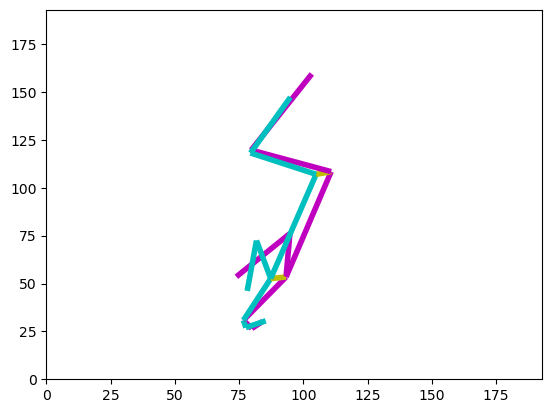

In [108]:
keypoints_with_scores = Xtest.iloc[[166]].to_numpy()
keypoints = np.reshape(keypoints_with_scores, (-1, 3))
keypoints = np.array([[keypoints]])
line_segments = LineCollection([], linewidths=(4), linestyle='solid')
(keypoint_locs, keypoint_edges,edge_colors) = _keypoints_and_edges_for_display(keypoints, 192, 192)
line_segments.set_segments(keypoint_edges)
line_segments.set_color(edge_colors)
fig, ax = plt.subplots()
ax.add_collection(line_segments)
ax.set_xlim([0, 193])
ax.set_ylim([0, 193])